<a href="https://colab.research.google.com/github/bryanvilcamarchand/Churn_prediction/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EL NEGOCIO DE LAS SUSCRIPCIONES Y LA IMPORTANCIA DEL CHURN

<img src='https://www.pointillist.com/wp-content/uploads/2017/11/Running-4-the-Exit-2-844x422.png' width="600" height="250">

El modelo de negocio basado en suscripciones existe hace muchos años, y este consiste en vender productos o servicios a cambio de un pago, que por lo general, es una cuota mensual.  Como ejemplo podemos citar la industria de la telefonía, servicios de streaming, televisión por cable, internet de fibra óptica, entre otras. En nuestro país, la cantidad de competidores en cada una de estas industrias ha ido incrementando, y esto conlleva a que la inversión en canales tradicionales y digitales para alcanzar a nuevos clientes deba ser mayor, en otras palabras, el costo de adquirir nuevos clientes es más alto. Sin embargo, estos esfuerzos no servirán de nada, si por un lado conseguimos nuevos clientes, pero por otro no podemos retener a aquellos que ya forman parte de nuestra cartera. Es por esto que la RETENCIÓN es una estrategia clave para mantener en positivo los flujos de ingresos y rentabilidad de las compañías.

El CUSTOMER CHURN o CUSTOMER ATTRITION se define como el % total de clientes que deciden dejar de pagar por un servicio o producto que tu compañía ofrece , durante un período específico. Este se puede calcular dividiendo el nro. de clientes que abandonaron el negocio en un período entre el total de clientes que se tenía al inicio de ese período, multiplicado por 100 para obtener un porcentaje.


<img src='https://retailrocket.net/wp-content/uploads/2021/05/fo-rmula-eng.png' width="500" height="200">

El CHURN PREDICTION nos permite detectar a aquellos clientes o usuarios que tienen probabilidad de dar de baja a la suscripción de tu servicio. Si podemos identificar de manera oportuna aquellos clientes con riesgo de abandonar la compañía y el motivo, se pueden diseñar acciones para conseguir la retención de ellos.


# CASO DE NEGOCIO:

En el presente proyecto tiene como reto crear un modelo que nos permita identificar aquellos clientes propoensos a dar de baja a su servicio de internet.

# INFORMACIÓN DEL DATASET

1. is_tv_subscriber: si tiene suscripción (1), no tiene suscripción (2)

2. is_movie_package_subscriber: si tiene suscripción (1), no tiene suscripción (2)

3. subscription_age: Cantidad de años de tener el servicio

4. bill_avg: promedio facturación de últimos 3 meses

5. reamining_contract: Cantidad de años para que finalice el contrato. Si es vacío, el cliente no tiene contratio. El cliente que tiene contrato debe usar su servicio hasta finalizar. Si cancela su servicio antes del final debe pagar una penalidad.

Existen dos formas en que un cliente podría estar utilizando los servicios. El primero es a través de un contrato por tiempo limitado que representa una cuota menor y el segundo es a través de una suscripción mensual normal que tiene una cuota mayor. Si una persona no tiene un contrato, sigue siendo un usuario que paga tarifas mensuales.

6. service_failure_count customer: Nro. de llamadas al centro de atención de servicio (CAC) por fallas en el servicio en los últimos 3 meses.

7. download_avg: Datos usados en los últimos 3 meses (GB).

8. upload_avg last: Carga de datos en los últimos 3 meses (GB).

9. download_over_limit: Cada cliente tiene un límite de datos. Al superar este límite se debe pagar adicional. Esta columna contiene conteo de veces en el que se superó el límite de datos en los últimos 9 meses.

10. Churn (target): si cliente cancela servicio (1).

Fuente: https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata


In [4]:
# Importamos librerias a utilizar
import os
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Habilitamos conexión a nuestro repositorio en Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Cargar nuestro dataset
df = pd.read_csv('/content/drive/MyDrive/Python/Churn Internet Service/internet_service_churn.csv')

In [7]:
# Damos una vista rápida del dataset
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [8]:
# Validamos proporción de clientes que mantienen y dan de baja al servicio
df['churn'].value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [9]:
churn = 40050
nochurn = 32224
z = churn + nochurn
churn_percentage = churn/z*100
nochurn_percentage = nochurn/z*100

In [10]:
print(f'El % de clientes que decide darse de baja es {churn_percentage}%')

El % de clientes que decide darse de baja es 55.41411849351081%


In [11]:
# Revisamos de manera general el total de features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


La cantidad de registros en nuestro dataset es 72,274.

In [12]:
# Validamos la cantidad de valores nulos
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

# EDA (Análisis explotario de los datos)

In [14]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


- Por lo menos el 75% de clientes cuenta con una suscripción a TV.
- Solo el 25% cuenta con suscripción a paquetes de películas.
- El 50% de clientes tiene un contrato de alrededor de 2 años.
- El 75% de clientes paga por debajo de $22 mensuales por el servicios.
- Al 75% de los clientes que cuenta con contrato les queda 1 año para que este finalice.
- Un cliente reportó fallas en su servicios hasta en 19 veces. 
- El 50% de clientes usa alrededor de 27 GB de manera mensual.
- el 50% de clientes efectúa cargas a internet alrededor de 2.1 GB.
- El 55% de clientes decide darse de baja.

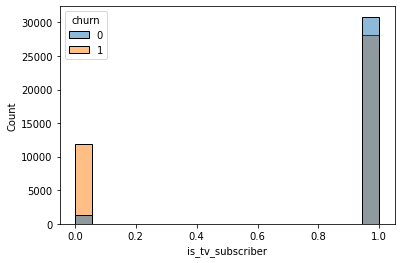

In [13]:
sns.histplot(data = df, x = 'is_tv_subscriber', hue = 'churn')

Existen más clientes con una suscripción de TV, sin embargo la proporción de cleitnes que deciden darse de baja es similar. Aquellos clientes que no cuentan con una suscripción de TV suelen no irse.

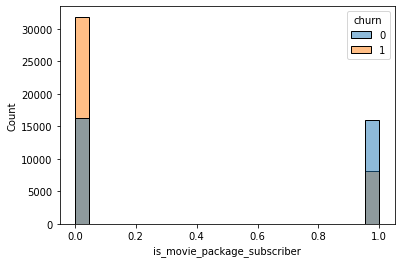

In [14]:
sns.histplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn')

Existen más personas que no cuentan con una suscripción de streaming. La tercera parte de los que cuentan con una y los que no se dan de baja.

In [15]:
df.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13350
                  1                                  2
1                 0                              34739
                  1                              24183
Name: is_movie_package_subscriber, dtype: int64

In [16]:
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].agg(['sum'])

churn
                                                sum
is_tv_subscriber is_movie_package_subscriber       
0                0                            11964
                 1                                2
1                0                            19891
                 1                             8193

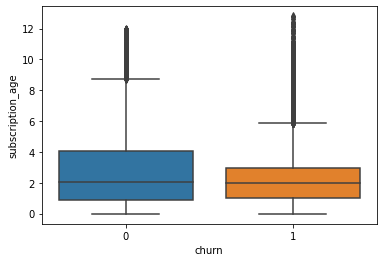

In [17]:
sns.boxplot(x="churn",y="subscription_age",data=df)
plt.show() 

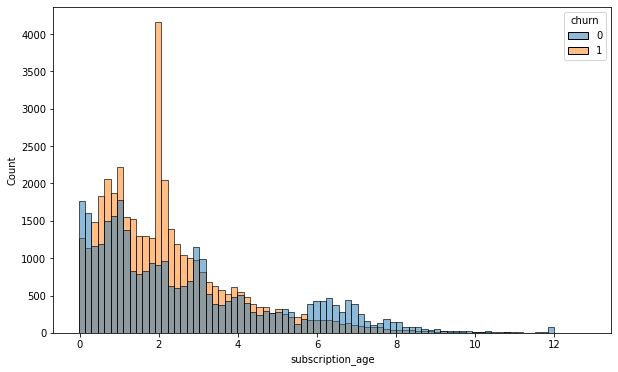

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='subscription_age', hue='churn', bins=80)	
plt.show()

Los clientes que no se dan de baja tienen una suscripción entre 1 a 4 años, y algunos casos atípicos por encima de 8 años. Los clientes que se dan de baja tienen suscripciones entre 1 a 3 años y por encima de 6 años.

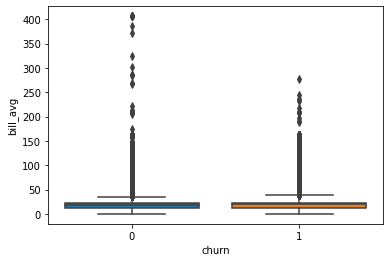

In [19]:
sns.boxplot(x="churn",y="bill_avg",data=df)
plt.show() 

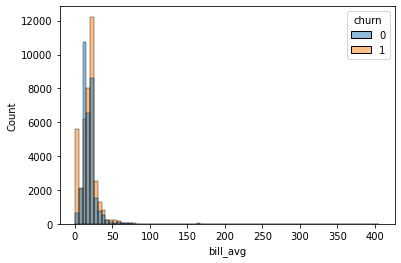

In [20]:
sns.histplot(data=df, x='bill_avg', hue='churn', bins=80)	

Aquellos clientes que tienen una cuota muy baja o muy alta tienen mayor probabilidad de irse. Aquellos que tienen una cuota promedio, suelen no darse de baja.

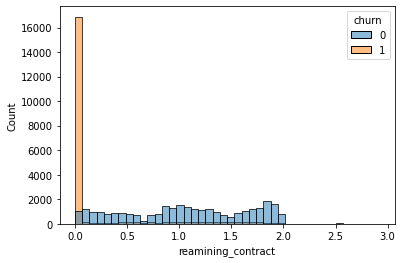

In [21]:
sns.histplot(data=df, x='reamining_contract', hue='churn')	

Aquellos clientes que no tienen contrato son los que suelen darse de baja. Animar a los clientes a firmar contratos de permanencia nos ayudará a reducir el churn.

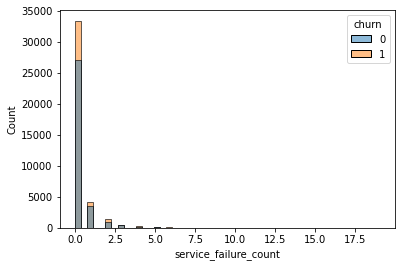

In [22]:
sns.histplot(data=df, x='service_failure_count', hue='churn', bins=50)	

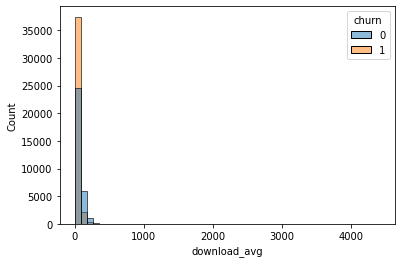

In [23]:
sns.histplot(data=df, x='download_avg', hue='churn', bins=50)	

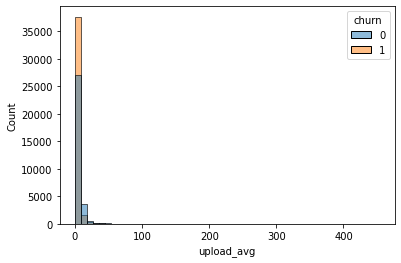

In [24]:
sns.histplot(data=df, x='upload_avg', hue='churn', bins=50)

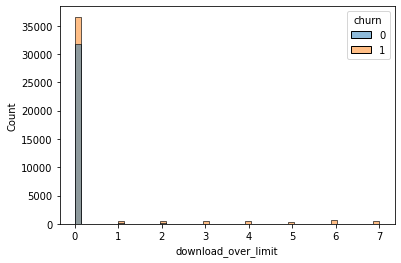

In [25]:
sns.histplot(data=df, x='download_over_limit', hue='churn', bins=50)

In [26]:
# Agrupamos aquellos clientes que se dan de baja y aquellos que no con los promedio de todas los feature
df.groupby('churn').mean()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
churn,,,,,,,,,,
0,1.092310e+06,0.956989,0.496214,2.727828,19.252731,1.072765,0.254593,64.884728,5.983563,0.031622
1,6.483943e+05,0.701223,0.204619,2.226554,18.692859,0.183152,0.290037,26.838312,2.767698,0.349213


Aquellos clientes que deciden darse de baja usan menos los datos, tanto para navegar o cargar información. Sin embargo, superan el límite de sus datos por encima de aquellos que no se dan de baja.

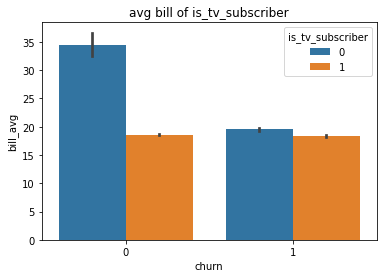

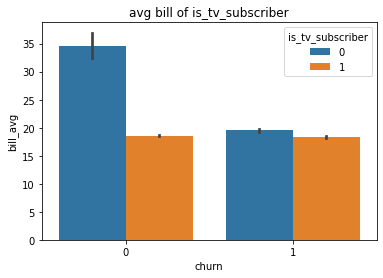

In [27]:
subscribers=["is_tv_subscriber","is_tv_subscriber"]
for i in subscribers:
    sns.barplot(x="churn",y="bill_avg",data=df,hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

# Tratamiento de datos para generar el modelo

Visualizamos que hay 21,572 datos vacíos en el feature "remaining_contract". Podemos asumir que esos clientes no tienen contrato. Haremos una limpieza. Lo mismo para los features "download_avg" y "upload_avg", estos clientes no consumen datos.

In [15]:
df['reamining_contract'].fillna(0, inplace=True)
df['download_avg'].fillna(0, inplace=True)
df['upload_avg'].fillna(0, inplace=True)

In [16]:
# Eliminar columna id
df = df.drop(['id'], axis=1)

In [17]:
## Veamos la correlación que existe entre las variables para decidir cual ingresará al modelo
correlation = df.corr()

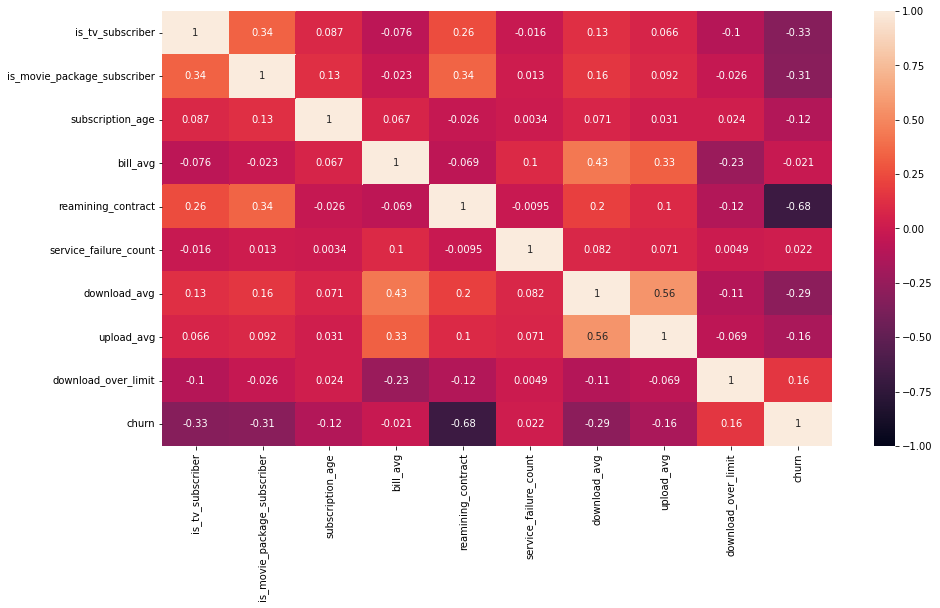

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

Los features que hacen al uso de los datos están altamente correlacionadas, seguidos por los  feautres suscripciones de TV y Movies. Creamos el modelo con todas ellas y luego otro suprimiendo una de ellas para validar si mejora nuestro poder predictivo.

In [19]:
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [20]:
y = df['churn']

In [21]:
X = df.drop(['churn'], axis=1)

In [22]:
# Normalizamos los datos numericos (Convertir datos en valores entre 0 y 1)
from sklearn import preprocessing

# Recordatorio: los transformadores de sklearn devuelven numpy arrays, no dataframes
min_max_scaler = preprocessing.MinMaxScaler()
X_normalizado = min_max_scaler.fit_transform(X)
print(X_normalizado)

[[1.00000000e+00 0.00000000e+00 9.33697348e-01 ... 1.90251857e-03
  5.07390249e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.42745710e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 6.96567863e-01 ... 3.10291720e-03
  1.98544011e-03 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 3.12012480e-03 ... 3.39735459e-04
  4.41208912e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.34009360e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.34009360e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [23]:
# Convertimos en dataframe los valores normalizados y mantenemos los nombres de las columnas.
X_normalizado = pd.DataFrame(X_normalizado, columns=X.columns)

In [24]:
X_normalizado.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,1.0,0.0,0.933697,0.061576,0.047945,0.000000,0.001903,0.005074,0.0
1,0.0,0.0,0.642746,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1.0,0.0,0.696568,0.039409,0.000000,0.000000,0.003103,0.001985,0.0
3,0.0,0.0,0.537441,0.051724,0.000000,0.052632,0.000000,0.000000,0.0
4,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, train_size=0.7, random_state=4)

In [27]:
X_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
49514,1.0,1.0,0.169267,0.041872,0.60274,0.0,0.021154,0.054489,0.000000
1965,1.0,1.0,0.686427,0.009852,0.00000,0.0,0.001472,0.001103,0.428571
7194,1.0,0.0,0.258190,0.051724,0.00000,0.0,0.009286,0.005515,0.000000
46548,1.0,0.0,0.017161,0.041872,0.00000,0.0,0.006206,0.001985,0.000000
7552,0.0,0.0,0.109204,0.000000,0.00000,0.0,0.000000,0.000000,0.000000


In [28]:
X_train.shape

(50591, 9)

In [29]:
X_test.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
61039,0.0,0.0,0.001560,0.000000,0.000000,0.0,0.000000,0.000000,0.0
43134,1.0,1.0,0.230109,0.064039,0.592466,0.0,0.023668,0.012795,0.0
70700,1.0,0.0,0.009360,0.039409,0.643836,0.0,0.007746,0.005956,0.0
4872,1.0,1.0,0.619345,0.091133,0.157534,0.0,0.016239,0.009707,0.0
65464,1.0,1.0,0.048362,0.036946,0.472603,0.0,0.015265,0.007059,0.0


In [30]:
X_test.shape

(21683, 9)

In [31]:
y_train.head()

49514    0
1965     0
7194     1
46548    1
7552     1
Name: churn, dtype: int64

In [32]:
y_test.head()

61039    1
43134    0
70700    0
4872     0
65464    0
Name: churn, dtype: int64

In [33]:
# Importamos libreria para crear modelo
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn import metrics

In [35]:
logis = LogisticRegression() # Definir el algoritmo o modelo
logis.fit(X_train, y_train) # Entrenar el modelo / Ajustar el modelo a los datos 

LogisticRegression()

In [36]:
predicciones_probabilidades = logis.predict_proba(X_test) #Este algoritmo tb puede predecir la probabilidad. Uso predict_proba
predicciones_probabilidades[:10]

array([[0.01612926, 0.98387074],
       [0.99116058, 0.00883942],
       [0.98140013, 0.01859987],
       [0.86568082, 0.13431918],
       [0.94063106, 0.05936894],
       [0.03125903, 0.96874097],
       [0.62907022, 0.37092978],
       [0.96978904, 0.03021096],
       [0.91164087, 0.08835913],
       [0.36385162, 0.63614838]])

(array([[4208., 4855., 2124., 1089.,  776.,  666.,  638.,  976., 1585.,
         4766.],
        [4766., 1585.,  976.,  638.,  666.,  776., 1089., 2124., 4855.,
         4208.]]),
 array([1.00371713e-07, 1.00000080e-01, 2.00000060e-01, 3.00000040e-01,
        4.00000020e-01, 5.00000000e-01, 5.99999980e-01, 6.99999960e-01,
        7.99999940e-01, 8.99999920e-01, 9.99999900e-01]),
 <a list of 2 Lists of Patches objects>)

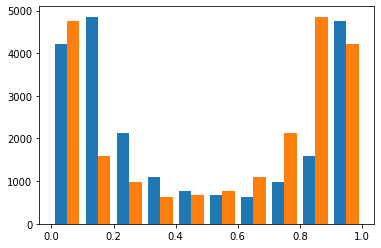

In [37]:
plt.hist(predicciones_probabilidades)

In [38]:
predicciones = logis.predict(X_test) #Con el predict predecimos la clase

predicciones[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [39]:
probs_df = pd.DataFrame(predicciones_probabilidades) #Para ver las probabilidad predichas en formato tabular.
probs_df

,0,1
0,0.016129,0.983871
1,0.991161,0.008839
2,0.981400,0.018600
3,0.865681,0.134319
4,0.940631,0.059369
...,...,...
21678,0.910053,0.089947
21679,0.993263,0.006737
21680,0.197784,0.802216
21681,0.989852,0.010148


Vamos a pegarle el real y prediccion para ver como interactúan entre ellos

In [40]:
df_resultados = X_test.reset_index().copy()
df_resultados["objetivo"] = y_test.tolist()
df_resultados["prediccion"] = predicciones
df_resultados = pd.concat([df_resultados, probs_df], axis=1)
df_resultados[["objetivo", "prediccion", 0, 1]].head(10)

,objetivo,prediccion,0,1
0,1,1,0.016129,0.983871
1,0,0,0.991161,0.008839
2,0,0,0.981400,0.018600
3,0,0,0.865681,0.134319
4,0,0,0.940631,0.059369
5,1,1,0.031259,0.968741
6,1,0,0.629070,0.370930
7,0,0,0.969789,0.030211
8,0,0,0.911641,0.088359
9,0,1,0.363852,0.636148


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [42]:
cm = confusion_matrix(y_test, predicciones)
cm

array([[ 7690,  1900],
       [  941, 11152]])

- Verdaderos positivos: 7,690 (Datos que eran 1 y el modelo lo predijo también). Clientes que se fueron y el modelo indica lo mismo.
- Veradderos negativos: 11,152 (Datos que eran 0 y el modelo lo predijo también). Clientes que no se fueron pero el modelo dijo que se iban.
- Falsos negativos: 1,900 (Datos reales que eran 1 y el modelo dijo que eran 0). Clientes que se fueron pero el modelo dijo que no se fueron.
- Falsos positivos: 941 (Datos reales eran 0 y el modelo dijo que eran 1). Clientes que no se fueron pero el modelo dijo que se iban.

# EXACTITUD (ACCURAY): capacidad del modelo para predecir los VN y VP.

- (VP+VN)/(VP+FP+FN+VN)

In [43]:
# Importamos metrica para calcular EXACTATIUD DEL MODELO
from sklearn.metrics import accuracy_score

In [44]:
# Exactitud del modelo ACCURACY
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.8689756952451229

In [45]:
# Calculo el accuracy manualmente
log_accuracy = (7690+11152)/(7690+1900+941+11152)
log_accuracy

0.8689756952451229

# PRECISION: capacidad del modelo para predecir los valores positivos entre el total de positivos.

- VP/(VP+FP)

In [46]:
# Precisión del modelo
log_pre = precision_score(y_test, predicciones)
log_pre

0.8544284400858106

# RECALL O SENSIBILIDAD: capacidad para predecir como positivos aquellos valores que son positivos. Se conoce como Tasa de Verdaderos Positivos. Se calculca dividiendo los VP entre el total de incidencias.

- VP/(VP+FN)

In [47]:
# Calculamos la SENSIBILIDAD (RECALL)
log_rec = recall_score(y_test, predicciones)
log_rec

0.9221863888199785

# ESPECIFICIDAD: capacidad para predecir los negativos. Se conoce como Tasa de Verdaderos Negativos. Se calcula dividiendo los VN, entre el total de incidencias.

- VN/(VN+FP)

In [48]:
# Calculamos PUNTAJE F1, la cual es una combinación entre PRECISION Y SENSIBILIDAD
from sklearn.metrics import f1_score

In [49]:
# f1
puntajef1 = f1_score(y_test, predicciones)
puntajef1

0.8870153111950686

In [50]:
# Calculamos CURVA AUC
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc = roc_auc_score(y_test,predicciones)
roc_auc

0.8620316719908026

In [52]:
from sklearn.metrics import roc_curve

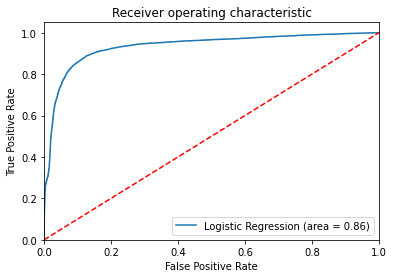

In [53]:
# Visualizamos nuestra curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predicciones_probabilidades[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Obtuvimos un alto valor de PRECISIÓN y RECALL que es bueno para un modelo como este.

Validaremos si la efectividad de nuestro modelo mejora con una selección de variables.

In [67]:
X.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,1,0,11.95,25,0.14,0,8.4,2.3,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0
2,1,0,8.91,16,0.00,0,13.7,0.9,0
3,0,0,6.87,21,0.00,1,0.0,0.0,0
4,0,0,6.39,0,0.00,0,0.0,0.0,0


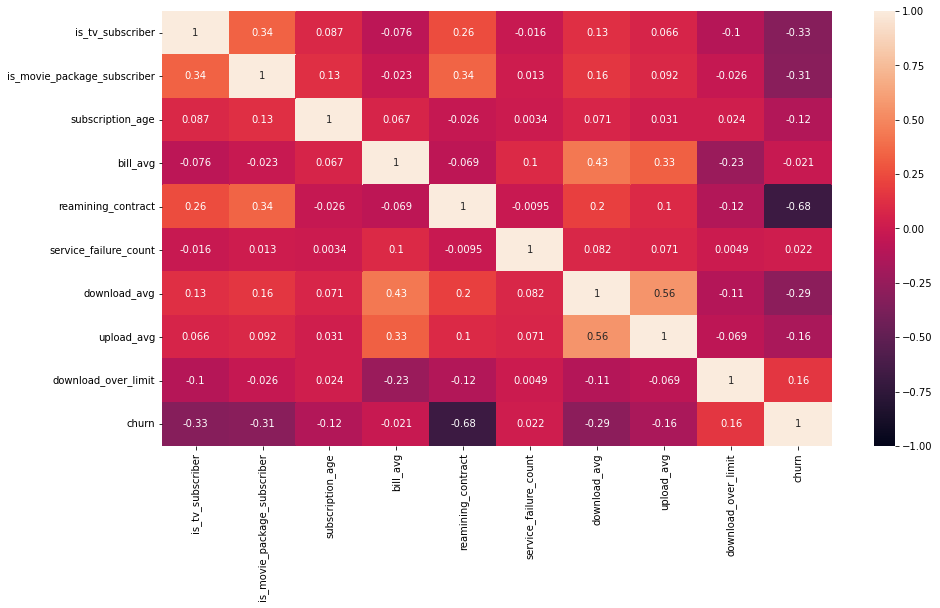

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

In [71]:
X_new = X_normalizado.drop(['is_movie_package_subscriber'], axis=1)
X_new = X_normalizado.drop(['upload_avg'], axis=1)
X_new = X_normalizado.drop(['bill_avg'], axis=1)

In [72]:
X_new.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,1.0,0.0,0.933697,0.047945,0.000000,0.001903,0.005074,0.0
1,0.0,0.0,0.642746,0.000000,0.000000,0.000000,0.000000,0.0
2,1.0,0.0,0.696568,0.000000,0.000000,0.003103,0.001985,0.0
3,0.0,0.0,0.537441,0.000000,0.052632,0.000000,0.000000,0.0
4,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0


In [73]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, train_size=0.7, random_state=4)

In [74]:
logis_new = LogisticRegression() # Definir el algoritmo o modelo
logis_new.fit(X_train_new, y_train_new) # Entrenar el modelo / Ajustar el modelo a los datos 

LogisticRegression()

In [76]:
predicciones_new = logis_new.predict(X_test_new) #Con el predict predecimos la clase

In [77]:
cm2 = confusion_matrix(y_test_new, predicciones_new)
cm2

array([[ 7701,  1889],
       [  934, 11159]])

In [78]:
# Precisión del modelo
log_pre2 = precision_score(y_test_new, predicciones_new)
log_pre2

0.855226854690374

In [79]:
# Calculamos la SENSIBILIDAD (RECALL)
log_rec2 = recall_score(y_test_new, predicciones_new)
log_rec2

0.9227652360869925

Nuestro modelo con selección de variables mejora ligeramente el poder predictivo del modelo.